# Курсовая работа по дисциплине "Технологии анализа данных и машинное обучение"

### Автор: Шихсаидов Ш.К.
### Группа: ПИ19-4.
### Тема: 45. Машинное обучение в задачах кредитного скоринга.  
 

In [1]:
# импортируем необходимые модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import f_classif, mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier, SGDClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix, auc
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set()

# Описательный анализ

### Описания признаков:
*client_id* - идентификатор клиента

*education* - уровень образования

*sex* - пол заемщика

*age* - возраст заемщика

*car* - флаг наличия автомобиля

*car_type* - флаг автомобиля иномарки

*decline_app_cnt* - количество отказанных прошлых заявок

*good_work* - флаг наличия “хорошей” работы

*bki_request_cnt* - количество запросов в БКИ

*home_address* - категоризатор домашнего адреса

*work_address* - категоризатор рабочего адреса

*income* - доход заемщика

*foreign_passport* - наличие загранпаспорта

*sna* - связь заемщика с клиентами банка

*first_time* - давность наличия информации о заемщике

*score_bki* - скоринговый балл по данным из БКИ

*region_rating* - рейтинг региона

*app_date* - дата подачи заявки

*default* - флаг дефолта по кредиту

In [2]:
# посмотрим на наш датасет
df = pd.read_csv("train.csv")
df = df.drop(columns='app_date') 
df = df.drop(columns='client_id') 
df

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   education         73492 non-null  object 
 1   sex               73799 non-null  object 
 2   age               73799 non-null  int64  
 3   car               73799 non-null  object 
 4   car_type          73799 non-null  object 
 5   decline_app_cnt   73799 non-null  int64  
 6   good_work         73799 non-null  int64  
 7   score_bki         73799 non-null  float64
 8   bki_request_cnt   73799 non-null  int64  
 9   region_rating     73799 non-null  int64  
 10  home_address      73799 non-null  int64  
 11  work_address      73799 non-null  int64  
 12  income            73799 non-null  int64  
 13  sna               73799 non-null  int64  
 14  first_time        73799 non-null  int64  
 15  foreign_passport  73799 non-null  object 
 16  default           73799 non-null  int64 

In [4]:
df.shape

(73799, 17)

In [5]:
df.nunique()

education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [6]:
df.describe()

,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [7]:
# признаки с большим количеством уникальных значений отнесем к числовым, за исключением app_date,
# так как он содержит дату в виде строки. В дальнейшем сделаем преобразование данного признака.
# Также не будем использовать признак client_id, так как все его значения уникальны
num_cols = ["age", "decline_app_cnt", "score_bki",
            "bki_request_cnt", "income", "region_rating"]

# к бинарным отнесем остальные признаки, количество уникальных значений которых равно 2
bin_cols = ["sex", "car", "car_type", "good_work", "foreign_passport"]

# все остальные - категориальные
cat_cols = ["education", "home_address", "work_address", "sna", "first_time"]

In [8]:
df["education"].fillna(df["education"].mode()[0], inplace=True)
df["education"].unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD'], dtype=object)

In [9]:
df = df.replace({'education' : {"SCH" : 0, "GRD" : 1, "UGR" : 2, "PGR" : 3, "ACD" : 4}, 
                 'sex' : {"M" : 0, "F" : 1}, 
                 'car' : {"N" : 0, "Y" : 1}, 
                 'car_type' : {"N" : 0, "Y" : 1}, 
                 'foreign_passport' : {"N" : 0, "Y" : 1}})

df

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,0,0,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0
1,0,1,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0
2,0,0,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0
3,0,1,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0
4,1,0,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,1,1,45,0,0,0,0,-1.792064,3,50,1,2,17000,4,4,0,0
73795,0,0,41,1,1,0,0,-2.058029,1,50,2,2,70000,1,4,0,0
73796,0,0,31,0,0,0,0,-1.512635,4,80,2,3,45000,2,2,0,0
73797,0,1,29,0,0,0,1,-1.479334,3,50,1,3,13000,2,3,0,1


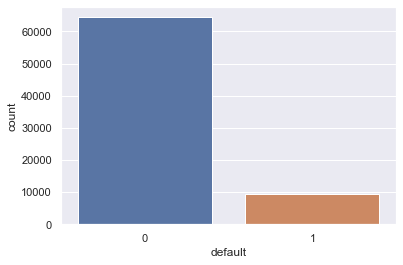

In [10]:
sns.countplot(x=df["default"]);

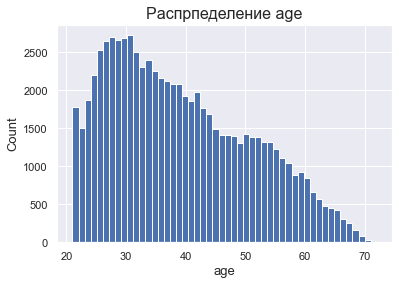

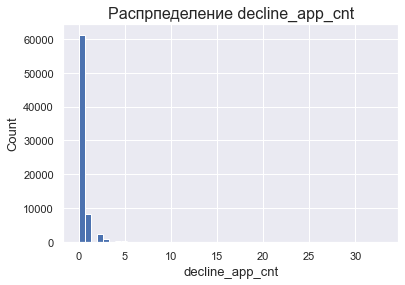

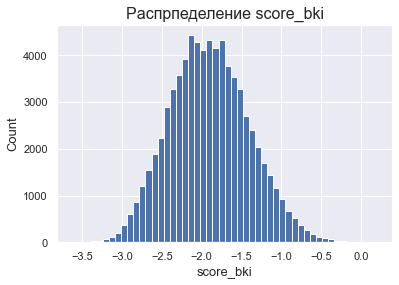

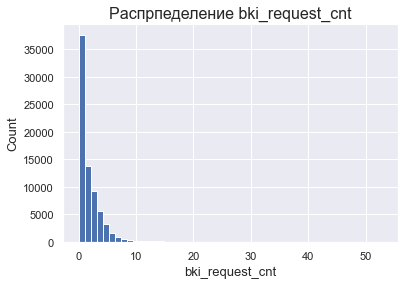

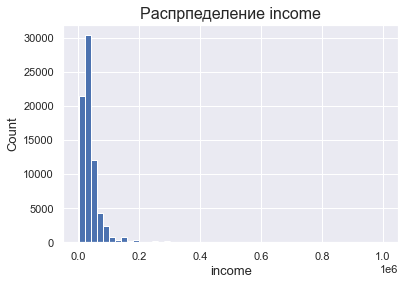

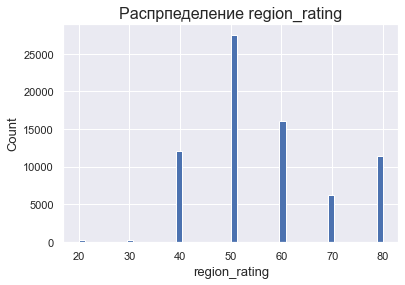

In [11]:
# посмотрим на распределение числовых переменных
for col in num_cols:
    plt.figure()
    h = df[col].hist(bins=50)
    h.set_title("Рaспрпеделение " + col, size = 16)
    h.set_xlabel(col, size = 13)
    h.set_ylabel('Count', size = 13)
    h.get_figure()

#### Выводы по числовым признакам:
- *age*: график распределения возраста смещен вправо, возраст имеет значения от 21 года до 72 лет и медианой 37 лет
- *decline_app_cnt* (количество отказанных прошлых заявок): распределение также смещено вправо, большинству клиентов (более 75%) раньше не отказывали в кредите, есть небольшое количество клиентов, кому отказывали много раз, максимальный результат - 33 раза. Я не считаю это выброс, т.к. такая ситуация возможна
- *score_bki* (скоринговый балл): признак распределен нормально, но похоже то, что он имеет очень много отрицательных значений это ошибка. Я узнал, что отрицательные значения возможны, но лишь в маленьком количестве случаев
- *bki_request_cnt* (количество запросов в БКИ): распределение признака сильно смещено вправо, более 75% клиентов имеют значение менее 3 запросов, но есть те, у кого количество запросов достигает больших значений. Максимум - 53 запроса. Это также не похоже на нереальный результат.
- *income*: доход клиентов варьируется от 1000 до 1000000 с медианным показателем 30000
- *region_rating*: рейтинг региона варьируется от 20 до 80

In [12]:
# обратим значения скорингового балла
df["score_bki"] = -df["score_bki"]

In [13]:
# признаки, которые имеют ярко выраженное смещение вправо, мы логарифмируем, для того,
# чтобы распределение было больше похоже на нормальное, остальные оставим как есть
skewed_features = ["age", "decline_app_cnt", "bki_request_cnt", "income"]
df[skewed_features] = np.log(df[skewed_features] + 1)

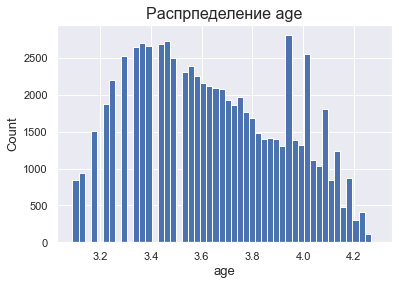

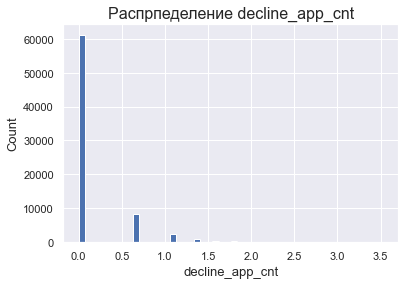

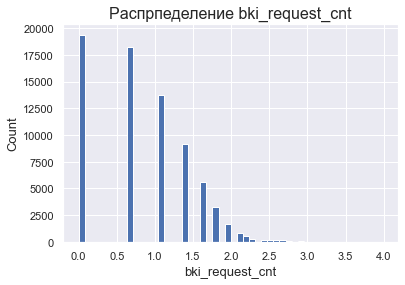

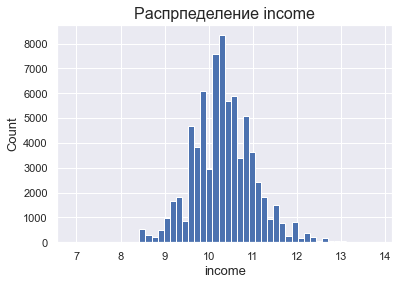

In [14]:
# распределение логарифмированных признаков
for col in skewed_features:
    plt.figure()
    h = df[col].hist(bins=50)
    h.set_title("Рaспрпеделение " + col, size = 16)
    h.set_xlabel(col, size = 13)
    h.set_ylabel('Count', size = 13)
    h.get_figure()

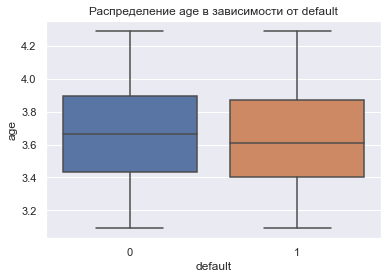

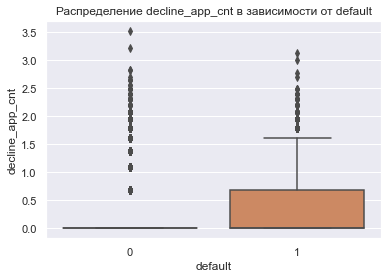

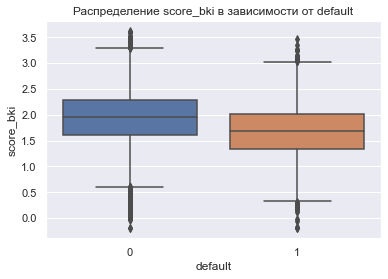

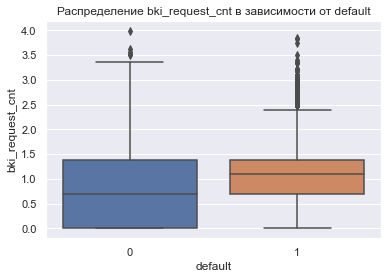

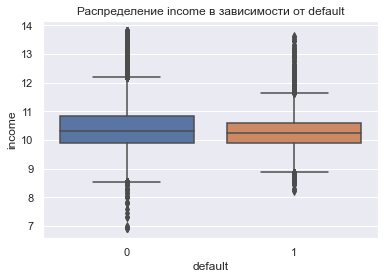

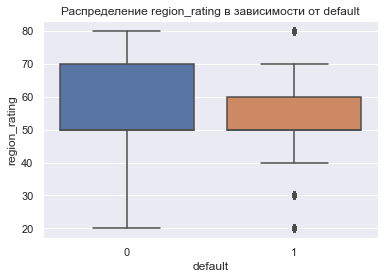

In [15]:
# посмотрим на распределение числовых признаков в зависимости от целевого признака
for col in num_cols:
    plt.figure()
    plt.title(f"Распределение {col} в зависимости от default")
    sns.boxplot(x="default", y=col, data=df)

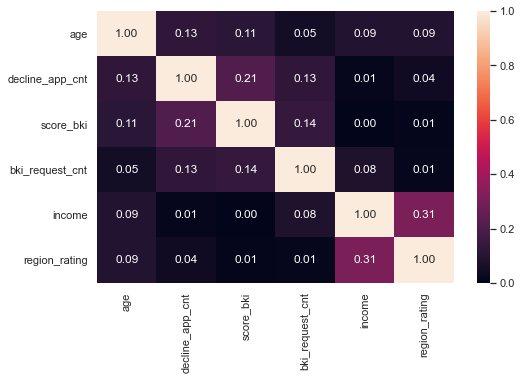

In [16]:
# посмотрим на корреляцию признаков между собой
plt.figure(figsize=(8, 5))
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f");

Наибольшая корреляция наблюдается между доходом и рейтингом региона, 0.31. Так как значения корреляции небольшие, оставляем все признаки

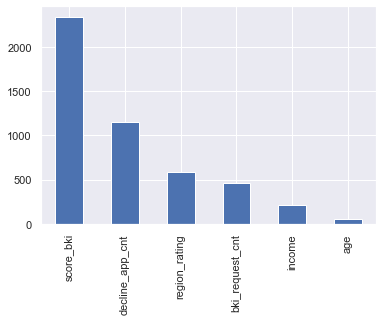

In [17]:
# используем дисперсионный анализ ANOVA для определения значимости наших числовых признаков
imp_num = pd.Series(f_classif(df[num_cols], df["default"])[0], index=num_cols)
imp_num.sort_values(inplace=True, ascending=False)
imp_num.plot(kind="bar");

Наибольшее влияние на вероятность дефолта имеет скоринговый балл, очень маленькое влияние - возраст.

### Категориальные и бинарные признаки

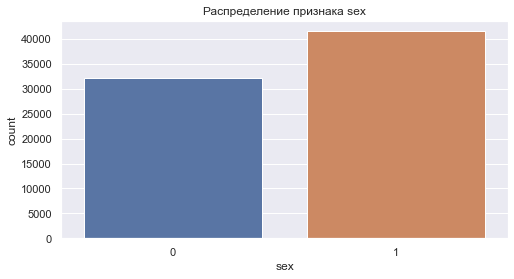

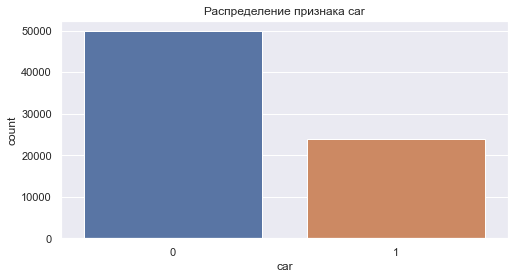

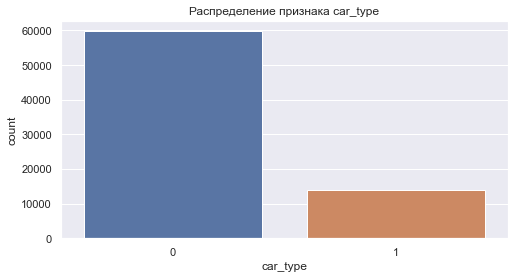

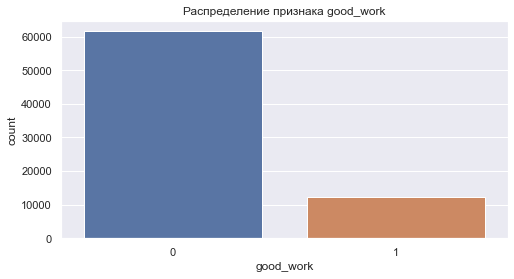

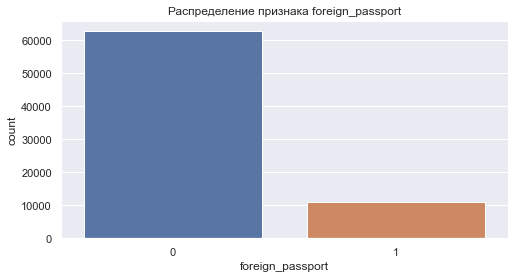

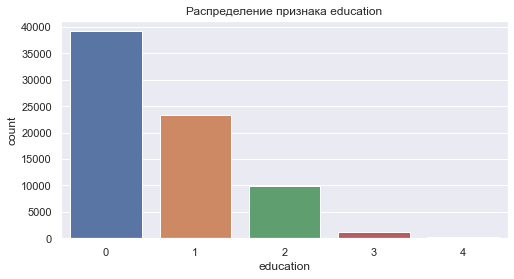

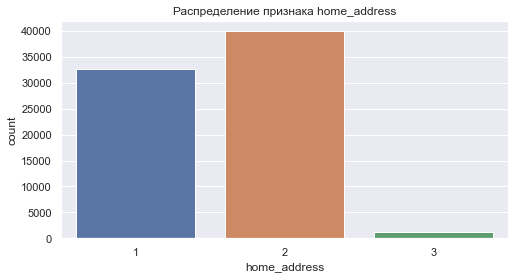

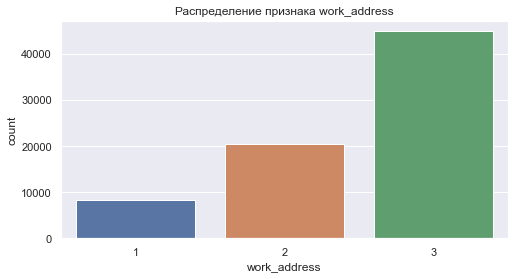

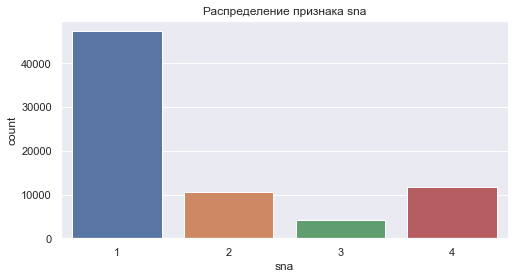

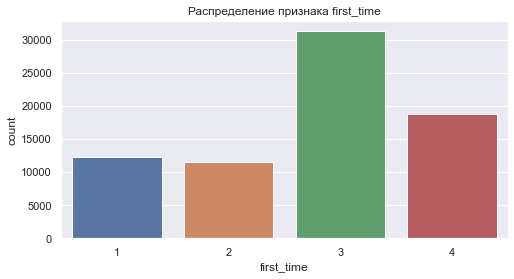

In [18]:
# посмотрим распределение категориальных и бинарных признаков
for col in bin_cols + cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f"Распределение признака {col}")

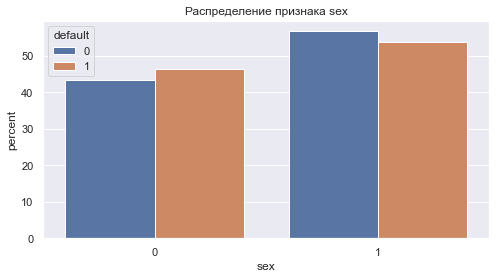

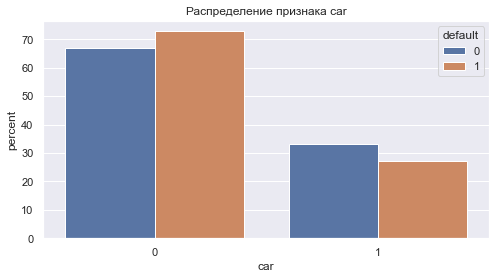

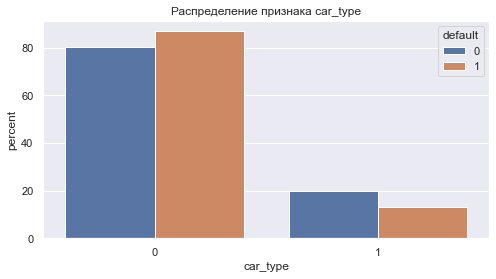

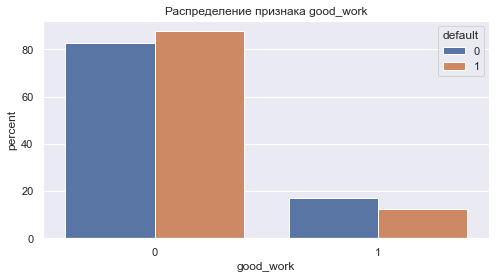

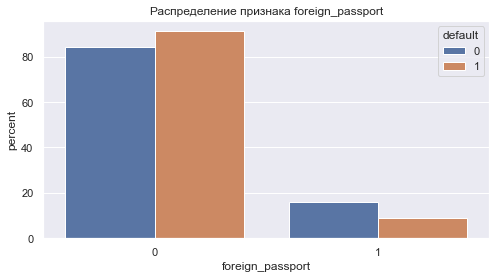

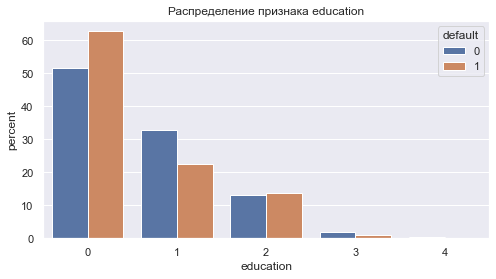

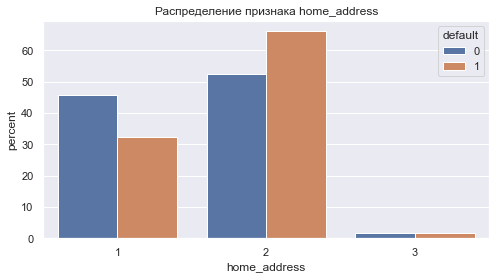

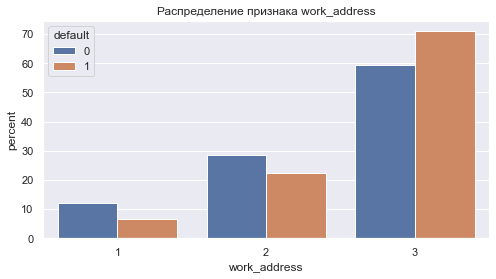

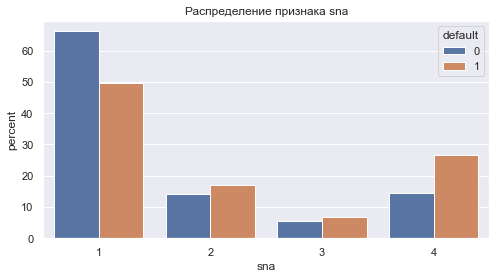

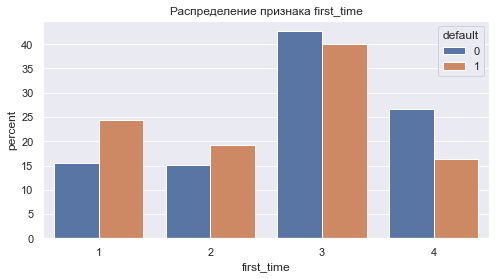

In [19]:
# теперь посмотрим распределение категориальных и бинарных признаков в зависимости от целевого признака
# графики показывают относительное распределение признаков по каждой группе клиентов: "хороших" и "плохих"
for col in bin_cols + cat_cols:
    plt.figure(figsize=(8, 4))
    prop_df = df[col].groupby(df["default"]).value_counts(normalize=True).rename("percent").reset_index()
    prop_df["percent"] *= 100
    sns.barplot(x=col, y="percent", hue="default", data=prop_df)
    plt.title(f"Распределение признака {col}")

#### Выводы по категориальным признакам:
- *sex*: женщин в выборке немного больше, чем мужчин; женщины более часто отдают кредит, чем мужчины, но разница незначительна
- *car*: клиентов с машиной примерно в 2 раза меньше, чем без машины. Те, у кого есть машина, более кредитоспособны
- *car_type*: клиентов, у которой машина иномарка, еще меньше, и они также более кредитоспособны. Судя по графикам, именно наличие иномарки влияет на кредитоспособность клиента. Чуть позже создадим новый признак, наличие отечественной машины, чтобы проверить предположение
- *good_work*: клиентов с хорошей работой значительно меньше, чем остальных и они более кредитоспособны
- *foreign_passport*: клиентов с загранпаспортом также значительно меньше остальных и они тоже более кредитоспособны
- *education*: чем выше уровень образования у клиента, тем выше вероятность вернуть кредит
- *home_address*: домашние адреса распределены по 3 категориям. Клиенты, проживающие в 1 категории адреса более кредитоспособны, чем во второй и в третьей
- *work_address*: рабочие адреса также распределены по 3 категориям. Клиенты, работающие в 1 и 2 категориях адреса более кредитоспособны, чем работающие в 3 категории
- *sna* (связь заемщика с клиентами банка): чем выше показатель, тем выше риск невозврата кредита
- *first_time* (давность наличия информациии о заемщике): чем выше показатель, тем более благонадежен клиент

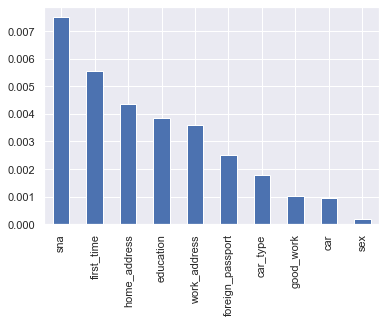

In [20]:
# определим значимость категориальных и бинарных признаков
imp_cat = pd.Series(mutual_info_classif(df[bin_cols + cat_cols], df["default"],
                                        discrete_features=True), index=bin_cols + cat_cols)
imp_cat.sort_values(inplace=True, ascending=False)
imp_cat.plot(kind="bar");

# Обучение и тестирование моделей

## Классические модели

In [21]:
df = df.drop(columns='age') 
df = df.drop(columns='sex') 
df.loc[(df.score_bki  < 0), 'score_bki'] = df.score_bki.median()


In [22]:
X = df.drop('default', axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y)

In [23]:
def show_confusion_matrix(y_pred):
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(conf_matrix, annot=labels, fmt='')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

def show_metrics(y_pred, y_score):
    if type(y_score) != bool:
        print('Roc-Auc:', roc_auc_score(y_test, y_score))
    print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
    print(f'Precision: {precision_score(y_pred, y_test)}')
    print(f'Recall: {recall_score(y_pred, y_test)}')
    print(f'F1: {f1_score(y_pred, y_test)}')
    
def show_roc_auc(y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()

def show_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y,
                                                        cv=10, scoring='accuracy', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.subplots(1, figsize=(7,7))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

### Логистическая регрессия

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (#sampling_strategy = 0.9,
    random_state=0,
    k_neighbors=4)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print(sum(y_train_res==1))
print(sum(y_train_res==0))

48320
48320


In [36]:
%%time
logreg_model = LogisticRegression(class_weight = 'balanced',
                                  max_iter=300, n_jobs = -1, 
                                 )
logreg_model.fit(X_train, y_train)
logreg_prediction = logreg_model.predict(X_test)
logreg_score = logreg_model.predict_proba(X_test)[:,1]
show_metrics(logreg_prediction, logreg_score)

Roc-Auc: 0.7234184610646773
Accuracy: 0.6689430894308943
Precision: 0.6534357661118224
Recall: 0.22425662809433133
F1: 0.3339149400218102
Wall time: 6.4 s


In [44]:
%%time
logreg_model = LogisticRegression(max_iter=300, n_jobs = -1)
logreg_model.fit(X_train_res, y_train_res)
logreg_prediction = logreg_model.predict(X_test)
logreg_score = logreg_model.predict_proba(X_test)[:,1]
show_metrics(logreg_prediction, logreg_score)

Roc-Auc: 0.7127524606636567
Accuracy: 0.6611382113821138
Precision: 0.647887323943662
Recall: 0.2185745140388769
F1: 0.32687338501291996
Wall time: 9.83 s


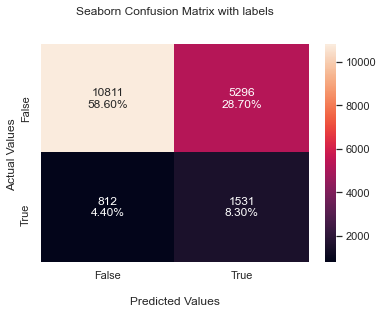

In [37]:
show_confusion_matrix(logreg_prediction)

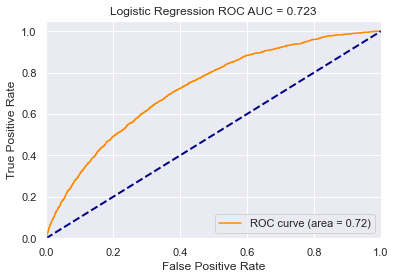

In [38]:
show_roc_auc(logreg_score)

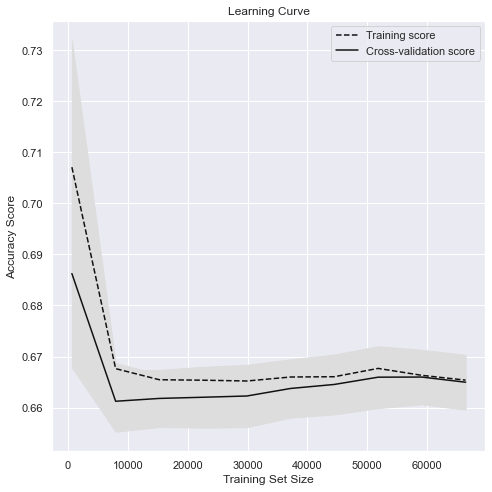

In [39]:
show_learning_curve(logreg_model)

In [35]:
%%time
parametrs = {'C': [0.0001, 0.01, 1, 10],
              "solver": ["sag", "lbfgs", "saga"], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'l1_ratio':[0.25, 0.5, 0.75]
            }

grid = GridSearchCV(logreg_model, parametrs, n_jobs = -1, scoring = 'f1')
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

Wall time: 8min 11s


{'C': 0.01, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'saga'}

### Метод K-ближайщих соседей

In [45]:
%%time
KNN_model = KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
KNN_score = KNN_model.predict_proba(X_test)[:,1]
show_metrics(KNN_prediction, KNN_score)

Roc-Auc: 0.6505011658986355
Accuracy: 0.8717073170731707
Precision: 0.03243704652155356
Recall: 0.4318181818181818
F1: 0.06034140531957126
Wall time: 15.2 s


In [56]:
%%time
KNN_model = KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train_res, y_train_res)
KNN_prediction = KNN_model.predict(X_test)
KNN_score = KNN_model.predict_proba(X_test)[:,1]
show_metrics(KNN_prediction, KNN_score)

Roc-Auc: 0.6415475058349253
Accuracy: 0.630569105691057
Precision: 0.558258642765685
Recall: 0.18451121455776556
F1: 0.27735368956743006
Wall time: 18.7 s


In [ ]:
show_confusion_matrix(KNN_prediction)

In [ ]:
show_roc_auc(KNN_score)

In [ ]:
show_learning_curve(KNN_model)

### Дерево решений

In [58]:
%%time
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_prediction = tree_model.predict(X_test)
tree_score = tree_model.predict_proba(X_test)[:,1]
show_metrics(tree_prediction, tree_score)

Roc-Auc: 0.544361622303852
Accuracy: 0.7450948509485095
Precision: 0.2752880921895006
Recall: 0.17671232876712328
F1: 0.21525112631403304
Wall time: 625 ms


In [ ]:
show_confusion_matrix(tree_prediction)

In [ ]:
show_roc_auc(tree_score)

In [ ]:
show_learning_curve(tree_model)

In [57]:
%%time
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_res, y_train_res)
tree_prediction = tree_model.predict(X_test)
tree_score = tree_model.predict_proba(X_test)[:,1]
show_metrics(tree_prediction, tree_score)

Roc-Auc: 0.5432887316391732
Accuracy: 0.7849322493224932
Precision: 0.2193768672641912
Recall: 0.1937429325292122
F1: 0.20576461168935148
Wall time: 408 ms


In [ ]:
show_confusion_matrix(tree_prediction)

In [ ]:
show_roc_auc(tree_score)

In [ ]:
show_learning_curve(tree_model)

### Линейный дискременантый анализ

In [59]:
%%time
LDA_model = LDA(n_components=1)
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)
LDA_score = LDA_model.predict_proba(X_test)[:,1]
show_metrics(LDA_prediction, LDA_score)

Roc-Auc: 0.7215813019107362
Accuracy: 0.8721409214092141
Precision: 0.03841229193341869
Recall: 0.45918367346938777
F1: 0.07089405277668373
Wall time: 533 ms


In [ ]:
show_confusion_matrix(LDA_prediction)

In [ ]:
show_roc_auc(LDA_score)

In [ ]:
show_learning_curve(LDA_model)

In [60]:
%%time
LDA_model = LDA(n_components=1)
LDA_model.fit(X_train_res, y_train_res)
LDA_prediction = LDA_model.predict(X_test)
LDA_score = LDA_model.predict_proba(X_test)[:,1]
show_metrics(LDA_prediction, LDA_score)

Roc-Auc: 0.714170447997137
Accuracy: 0.6584281842818428
Precision: 0.6534357661118224
Recall: 0.21806010539809145
F1: 0.32699700982486113
Wall time: 256 ms


In [ ]:
show_confusion_matrix(LDA_prediction)

In [ ]:
show_roc_auc(LDA_score)

In [ ]:
show_learning_curve(LDA_model)

### Наивный байесовский метод

In [ ]:
%%time
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
NB_prediction = NB_model.predict(X_test)
NB_score = NB_model.predict_proba(X_test)[:,1]
show_metrics(NB_prediction, NB_score)

In [ ]:
show_confusion_matrix(NB_prediction)

In [ ]:
show_roc_auc(NB_score)

In [ ]:
show_learning_curve(NB_model)

### Многослойный перцептрон

In [ ]:
%%time
MLP_model = MLPClassifier()
MLP_model.fit(X_train, y_train)
MLP_prediction = MLP_model.predict(X_test)
MLP_score = MLP_model.predict_proba(X_test)[:,1]
show_metrics(MLP_prediction, MLP_score)

In [ ]:
show_confusion_matrix(MLP_prediction)

In [ ]:
show_roc_auc(MLP_score)

In [ ]:
show_learning_curve(MLP_model)

### Модель RidgeClassifier

In [ ]:
%%time
ridge_model = RidgeClassifier(class_weight = 'balanced')
ridge_model.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
# ridge_score = ridge_model.predict_proba(X_test)[:,1]
show_metrics(ridge_prediction, False)

In [ ]:
show_confusion_matrix(ridge_prediction)

### Стохастический градиентный спуск

In [ ]:
%%time
SGD_model = SGDClassifier(loss = 'log', **grid_sgd.best_params_)
SGD_model.fit(X_train, y_train)
SGD_prediction = SGD_model.predict(X_test)
SGD_score = SGD_model.predict_proba(X_test)[:,1]
show_metrics(SGD_prediction, SGD_score)

In [ ]:
show_confusion_matrix(SGD_prediction)

In [ ]:
show_roc_auc(SGD_score)

In [ ]:
show_learning_curve(SGD_model)

In [ ]:
%%time
parametrs = {'penalty': ['l2', 'l1', 'elasticnet'], 
              'alpha': [0.00001, 0.0001, 0.001, 0.01], 
             'l1_ratio': [0.1, 0.15, 0.2], 
            }

grid_sgd = GridSearchCV(SGD_model, parametrs, n_jobs = -1, scoring = 'f1')
grid_sgd.fit(X_train, y_train)
grid_sgd.best_params_

## Ансамблевые модели

### Случайый лес

In [ ]:
%%time
forest_model = RandomForestClassifier()
#                                 n_estimators=50,
#                                bootstrap = True,
#                                max_features = 'sqrt'
                                    
forest_model.fit(X_train, y_train)
forest_prediction = forest_model.predict(X_test)
forest_score = forest_model.predict_proba(X_test)[:,1]
show_metrics(forest_prediction, forest_score)

In [ ]:
show_confusion_matrix(forest_prediction)

In [ ]:
show_roc_auc(forest_score)

In [ ]:
show_learning_curve(forest_model)

### Градиентный бустинг

In [ ]:
%%time
GB_model = GradientBoostingClassifier(**grid.best_params_)
                                    
GB_model.fit(X_train, y_train)
GB_prediction = GB_model.predict(X_test)
GB_score = GB_model.predict_proba(X_test)[:,1]
show_metrics(GB_prediction, GB_score)

In [ ]:
%%time
GB_model = GradientBoostingClassifier(**grid.best_params_)
                                    
GB_model.fit(X_train, y_train)
GB_prediction = GB_model.predict(X_test)
GB_score = GB_model.predict_proba(X_test)[:,1]
show_metrics(GB_prediction, GB_score)

In [ ]:
show_confusion_matrix(GB_prediction)

In [ ]:
show_roc_auc(GB_score)

In [ ]:
show_learning_curve(GB_model)

In [ ]:
%%time
parametrs = {'loss' : ['deviance', 'exponential'], 
              'learning_rate': [0.05, 0.1, 0.25],
             'n_estimators': [50, 100, 150], 
             'max_depth': [2, 3, 4], 
             'max_features': ['auto', 'sqrt', 'log2']
            }

grid = GridSearchCV(GB_model, parametrs, n_jobs = -1, scoring = 'f1')
grid.fit(X_train, y_train)
grid.best_params_

### Метод опорных векторов

In [ ]:
%%time
SVC_model = SVC()
SVC_model.fit(X_train_res, y_train_res)
SVC_prediction = SVC_model.predict(X_test)
SVC_score = SVC_model.predict_proba(X_test)[:,1]
show_metrics(SVC_prediction, SVC_score)

In [ ]:
show_confusion_matrix(SVC_prediction)

In [ ]:
show_roc_auc(SVC_score)

In [ ]:
show_learning_curve(SVC_model)